In [226]:
import pandas as pd
import cv2 as cv

In [227]:
# wget https://www.robots.ox.ac.uk/~vgg/data/scenetext/preproc/imnames.cp
# wget https://www.robots.ox.ac.uk/~vgg/data/scenetext/preproc/bg_img.tar.gz

In [228]:
import numpy as np
import cv2
my_img = np.zeros((350, 350), dtype = "uint8")
cv2.imshow('Window', my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [229]:
my_img = np.zeros((350, 350), dtype = "uint8")
cv2.rectangle(my_img, (50, 50), (300, 200), (255, 255, 255), 1)
cv2.imshow('Window', my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [239]:
# chose bg-shape , color
shape_chosen = np.random.choice(["rectangle","circle"],p=[0.5,0.5])
bg_color = list(np.random.randint(low=0, high=255, size=3))
bg_color = [int(c) for c in bg_color]
my_img = np.zeros((350, 350,3), dtype = "uint8")
img_mask = np.zeros((350, 350,3), dtype = "uint8")
print(shape_chosen,bg_color)
if shape_chosen == "rectangle":
    cv2.rectangle(my_img, (25, 25), (325, 200), bg_color, -1)
    cv2.rectangle(img_mask, (25, 25), (325, 200), (255,255,255), -1)
else:
    cv2.circle(my_img, (175, 175), 150, bg_color, -1)
    cv2.circle(img_mask,(175, 175), 150,  (255,255,255), -1)

cv2.imshow('Window', my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

circle [104, 181, 147]


In [237]:
dfeng = pd.read_csv("../input/text/english.csv")
eng_phrases = dfeng["English"].tolist()
phrase = np.random.choice(eng_phrases).strip(".")
if np.random.random()<0.5:
    phrase = phrase.upper()
phrase    

'WE LIKE IT VERY MUCH'

In [240]:
from PIL import ImageFont, ImageDraw, Image
import glob
# pick font
fontpaths = glob.glob("../input/font_cp/*.ttf")
fontpath = np.random.choice(fontpaths)
# pick color
tx_color = list(np.random.randint(low=0, high=255, size=3))
tx_color = tuple([int(c) for c in tx_color])
# pick size
fontsize = np.random.randint(10,90)
# pick starting point
starting_posx = np.random.randint(25,150)
starting_posy = np.random.randint(25,125)

font = ImageFont.truetype(fontpath, fontsize)
img_pil = Image.fromarray(my_img)
draw = ImageDraw.Draw(img_pil)
draw.text((starting_posx, starting_posy), phrase, font = font, fill = tx_color)

img = np.array(img_pil)
img = cv2.bitwise_and(img,img_mask)

cv2.imshow("res", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [195]:
font_width,font_height = font.getsize(phrase)
font_width,font_height,starting_posx, starting_posy

(244, 33, 46, 30)

In [241]:
font.getmask(phrase).getbbox()

(0, 0, 126, 16)

In [242]:
bboxmask = np.zeros_like(img)
if shape_chosen!="rectangle":
    cv2.rectangle(bboxmask, (starting_posx, starting_posy), (min(175+150,starting_posx+font_width),min(175+150,starting_posy+font_height)), (255,255,255), -1)
else:
    cv2.rectangle(bboxmask, (starting_posx, starting_posy), (min(325,starting_posx+font_width),min(200,starting_posy+font_height)), (255,255,255), -1)
cv2.imshow("res", bboxmask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [244]:
texturefiles = glob.glob("../input/textures/archive/dtd/images/*/*.jpg")
# print(len(textures))
texturefile = np.random.choice(texturefiles)
print(texturefile)
texture = cv2.imread(texturefile)
texture = cv2.resize(texture, (350,350), interpolation = cv2.INTER_AREA)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2GRAY)
texture = cv2.cvtColor(texture, cv2.COLOR_GRAY2BGR)

maskedtexture = cv2.bitwise_and(texture,img_mask)
mu, sigma = 0.1, 0.05
s = np.random.normal(mu, sigma, 500)
s = np.abs(s)

alpha = np.random.choice(s)
print(alpha)
overlaytexture = cv2.addWeighted(maskedtexture, alpha, img, 1 - alpha,
		0, img)

cv2.imshow("texture", overlaytexture)
cv2.waitKey(0)
cv2.destroyAllWindows()

../input/textures/archive/dtd/images\blotchy\blotchy_0060.jpg
0.1101171319385665


In [245]:
font_width, font_height

(244, 33)

In [246]:
import pickle as cp
with open('../input/imnames.cp.1', 'rb') as f:
  filtered_imnames = set(cp.load(f))

In [247]:
# bgs = glob.glob("../input/bg_img/*/*.jpg")
# print(len(bgs))
bgs =  list(filtered_imnames)
bgs = ["../input/bg_img/bg_img/"+t for t in bgs]
# plt.imread(bgs[0])
len(bgs)

8010

In [248]:
bg_img = cv2.imread(bgs[100])
cv2.imshow("bg", bg_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [249]:

cv2.imshow("texture", overlaytexture)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [250]:
bg_img.shape,overlaytexture.shape,bboxmask.shape

((600, 800, 3), (350, 350, 3), (350, 350, 3))

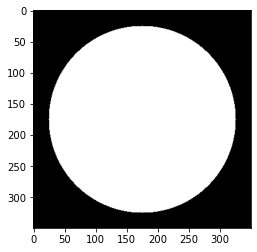

In [251]:
import matplotlib.pyplot as plt
plt.imshow(img_mask)

In [252]:
img_mask.shape

(350, 350, 3)

(350, 350, 4)


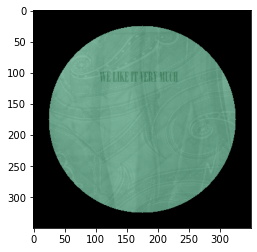

In [253]:
overlaytexture = np.dstack((overlaytexture,img_mask[:,:,1]))
print(overlaytexture.shape)
plt.imshow(overlaytexture[:,:,:3])

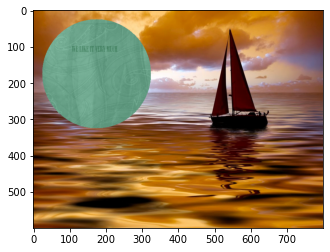

In [254]:
bkbg_img = bg_img[:,:,:].copy()
start_position = (0,0)
roi = bkbg_img[start_position[0]:overlaytexture.shape[0],start_position[1]:overlaytexture.shape[1],:]
fg_ = cv2.bitwise_and(overlaytexture[:,:,:3],overlaytexture[:,:,:3],mask=overlaytexture[:,:,3])
roi = cv2.bitwise_and(roi,roi,mask=cv2.bitwise_not(overlaytexture[:,:,3]))

dst = cv2.add(roi,fg_)
bkbg_img[start_position[0]:overlaytexture.shape[0],start_position[1]:overlaytexture.shape[1],:] = dst
plt.imshow(bkbg_img)

In [255]:
overlaytexture.shape

(350, 350, 4)

In [256]:
font_width,font_height,bg_img.shape

(244, 33, (600, 800, 3))

In [224]:
max_scale = min(bg_img.shape[0]/font_width,bg_img.shape[1]/font_height)
scalefactor = np.random.randint(10,max_scale*100)/100
print(scalefactor)


2.35


2.34


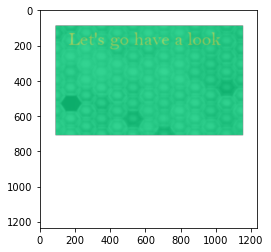

In [225]:
# Random Scale
max_scale = min(bg_img.shape[0]/font_width,bg_img.shape[1]/font_height)
scalefactor = np.random.randint(10,max_scale*100)/100
print(scalefactor)
h,w,_ = overlaytexture.shape
scaled = cv2.resize(overlaytexture,(int(h*scalefactor),int(w*scalefactor)), interpolation = cv2.INTER_AREA)
plt.imshow(scaled)

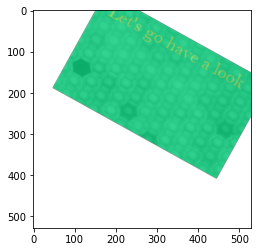

In [223]:
# Random Rotate
overlaytexture = scaled
(h, w) = overlaytexture.shape[:2]
center = (w // 2, h // 2)
angle = np.random.randint(-60,60)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(overlaytexture, M, (w, h),
	flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
plt.imshow(rotated)

In [187]:
bkbg_img = bg_img[:,:,:].copy()
start_position = (0,0)
roi = bkbg_img[start_position[0]:rotated.shape[0],start_position[1]:rotated.shape[1],:]
fg_ = cv2.bitwise_and(rotated[:,:,:3],rotated[:,:,:3],mask=rotated[:,:,3])
roi = cv2.bitwise_and(roi,roi,mask=cv2.bitwise_not(rotated[:,:,3]))

dst = cv2.add(roi,fg_)
bkbg_img[start_position[0]:rotated.shape[0],start_position[1]:rotated.shape[1],:] = dst
plt.imshow(bkbg_img)

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\core\src\arithm.cpp:241: error: (-215) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function cv::binary_op


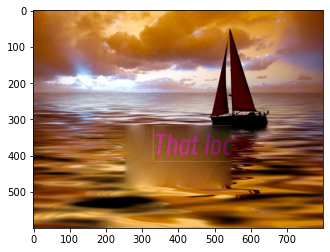

In [112]:
output = cv2.seamlessClone(overlaytexture[:,:,:3], bg_img, overlaytexture[:,:,-1], (400,400), cv2.NORMAL_CLONE)
plt.imshow(output)